In [1]:
import numpy as np

from scipy import stats

import collections

from astropy import modeling
from astropy.utils import find_current_module

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import sys

pathtoinsert = '..'  # should have emceemr
if pathtoinsert not in sys.path:
    sys.path.insert(1, pathtoinsert)

import emceemr

from importlib import reload
reload(emceemr.pmodel)

from emceemr.noise_models import generate_logpdfmodel_class
from emceemr.pmodel import ProbabilisticModel

In [4]:
mean_model = modeling.models.Linear1D(slope=2, intercept=1)
noise_model = generate_logpdfmodel_class(stats.norm(scale=1), scale_param_name='sigma')(sigma=1.5)

pm = ProbabilisticModel(mean_model, noise_model)
pm, pm.parameters

(<ProbabilisticModel(slope, intercept, sigma)>,
 {'slope': ProbabilisticParameter(name='slope', description='mean model parameter "slope"', prior=None, posterior_samples=None, unit=None), 'intercept': ProbabilisticParameter(name='intercept', description='mean model parameter "intercept"', prior=None, posterior_samples=None, unit=None), 'sigma': ProbabilisticParameter(name='sigma', description='data distribution parameter "sigma"', prior=None, posterior_samples=None, unit=None)})

In [5]:
example_x = np.linspace(0, 10, 100)
example_y = pm.data_distribution.distribution.rvs(loc=pm.mean_model(example_x), scale=pm.data_distribution.sigma)

pm.ln_prob([pm.mean_model.slope, pm.mean_model.intercept, pm.data_distribution.sigma], example_x, example_y)

-179.05294343500924

In [6]:
pm.slope.prior = stats.uniform(0, scale=4)
pm.intercept.prior = stats.uniform(0, scale=2)
pm.sigma.prior = stats.truncnorm(-2, np.inf, loc=2, scale=.5)

In [7]:
pm.ensemble_sample(example_x, example_y, 1000, 'ball')

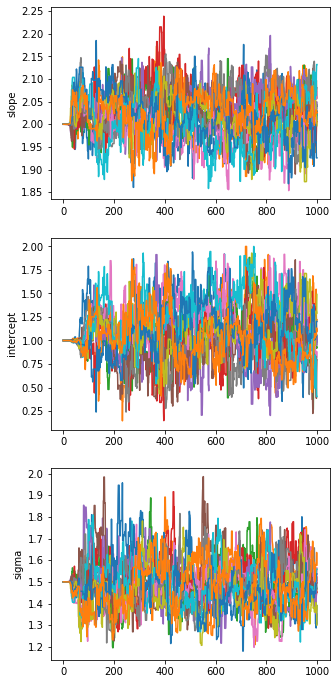

In [8]:
pm.plot_chains();

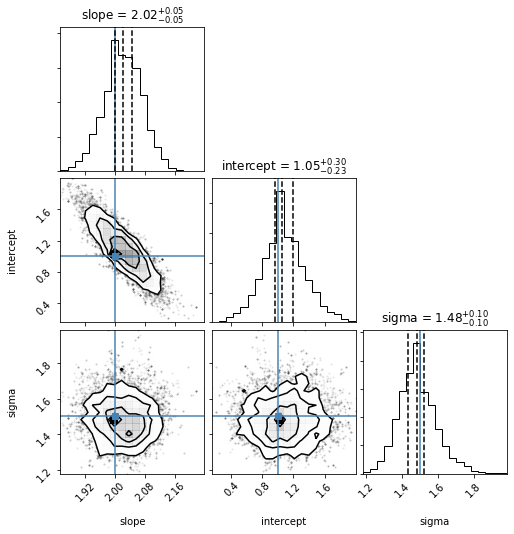

In [12]:
pm.plot_corner(truths=[pm.mean_model.slope, pm.mean_model.intercept, pm.data_distribution.sigma]);